In [52]:
import warnings
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")

In [53]:
df=pd.read_csv('/content/boston.csv')
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [54]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [55]:
df.shape

(506, 14)

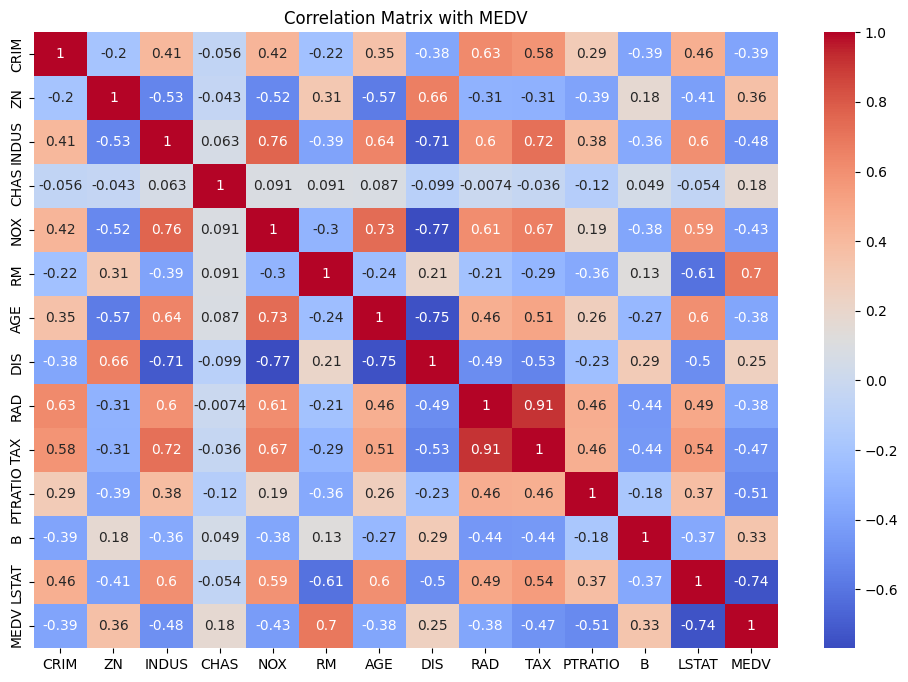

In [56]:
# Create a heatmap to show strength of correlation between features and target
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix with MEDV")
plt.show()

In [57]:
#drop weak corelation columnes with target
df.drop(["CHAS","B"],axis=1,inplace=True)
df.head()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0.538,6.575,65.2,4.0900,1,296.0,15.3,4.98,24.0
1,0.02731,0.0,7.07,0.469,6.421,78.9,4.9671,2,242.0,17.8,9.14,21.6
2,0.02729,0.0,7.07,0.469,7.185,61.1,4.9671,2,242.0,17.8,4.03,34.7
3,0.03237,0.0,2.18,0.458,6.998,45.8,6.0622,3,222.0,18.7,2.94,33.4
4,0.06905,0.0,2.18,0.458,7.147,54.2,6.0622,3,222.0,18.7,5.33,36.2


In [58]:
# show number of unique values in each column and their datatypes
dtypes=df.dtypes
nuniq=df.nunique()
pd.DataFrame({'dtypes':dtypes,'nunique':nuniq}).T

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
dtypes,float64,float64,float64,float64,float64,float64,float64,int64,float64,float64,float64,float64
nunique,504,26,76,81,446,356,412,9,66,46,455,229


In [59]:
#check about nulls in each column
null=df.isnull().sum()
ratio=null/df.shape[0]
pd.DataFrame({"Null_sum":null,"Ratio":ratio}).T

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
Null_sum,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Ratio,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [60]:
#check about duplicated rows
df.duplicated().sum()

np.int64(0)

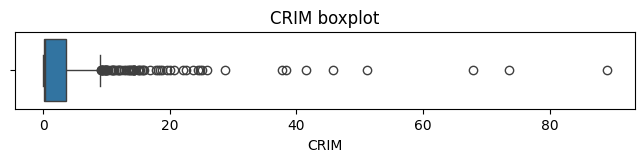

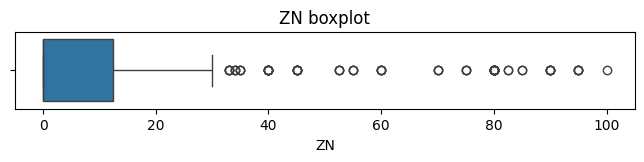

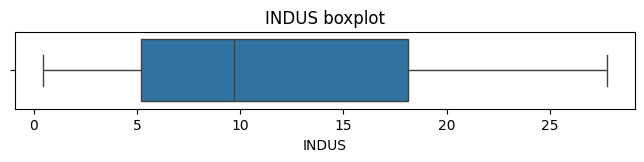

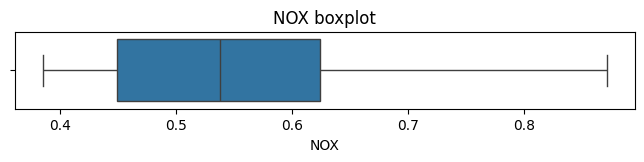

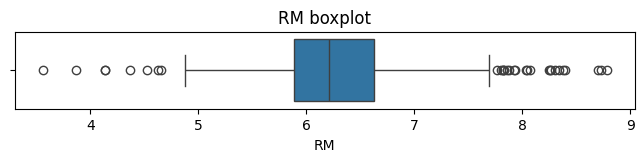

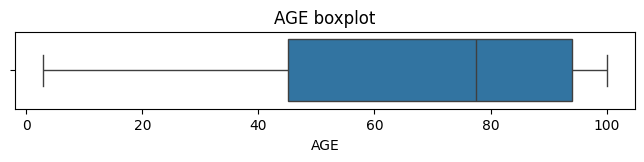

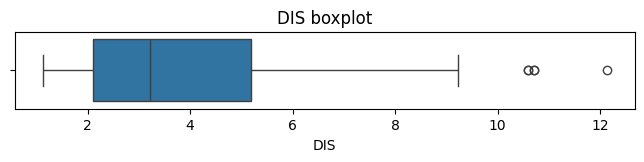

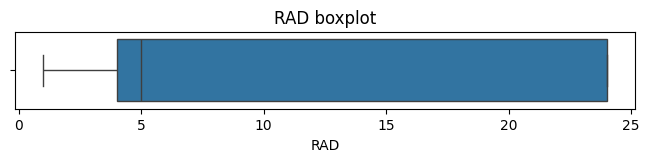

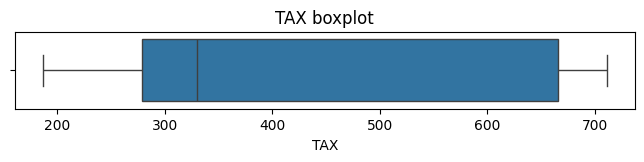

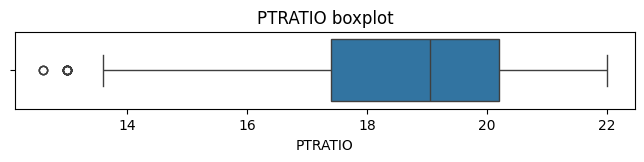

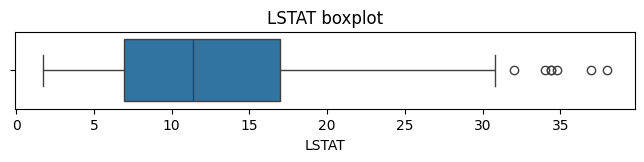

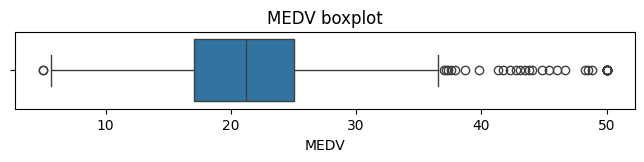

In [61]:
#check about outliers
num_cols = df.select_dtypes("number").columns
for col in num_cols:
    plt.figure(figsize=(8, 1))
    sns.boxplot(df[col], orient="h")
    plt.title(f"{col} boxplot")
    plt.show()

In [62]:
#remove outliers
for col in num_cols:
  Q1=df[col].quantile(.25)
  Q3=df[col].quantile(.75)
  IQR=Q3-Q1
  lower_Fence=Q1-1.5*IQR
  upper_Fence=Q3+1.5*IQR
  lower_outliers=df[df[col]<lower_Fence][col].values
  upper_outliers=df[df[col]>upper_Fence][col].values
  df[col].replace(lower_outliers,lower_Fence,inplace=True)
  df[col].replace(upper_outliers,upper_Fence,inplace=True)

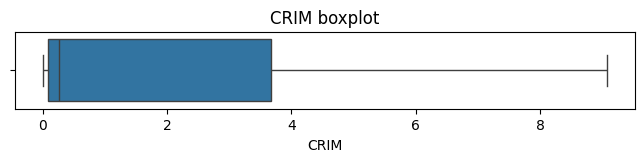

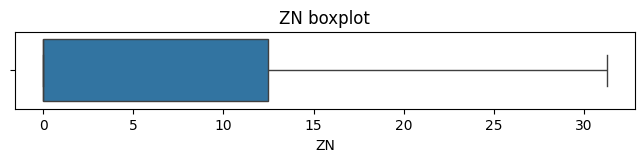

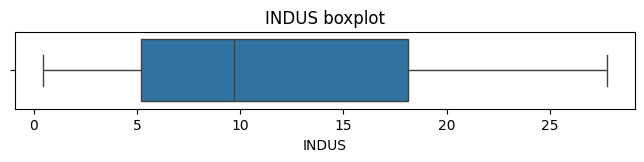

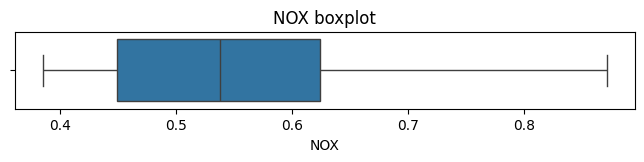

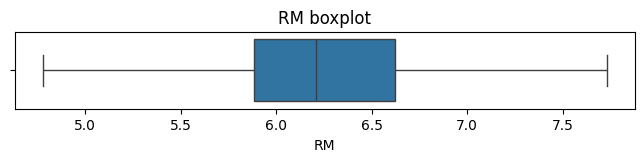

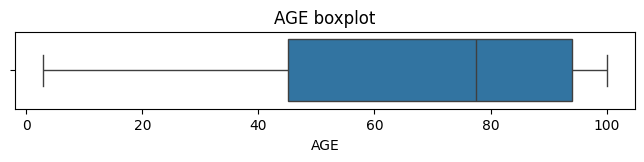

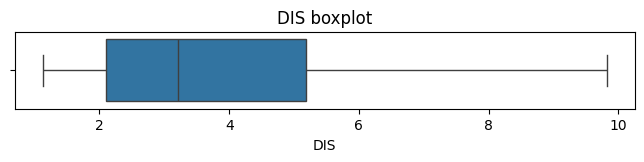

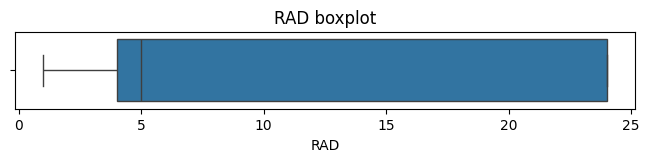

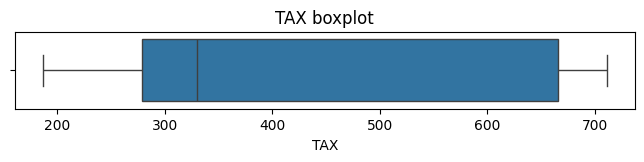

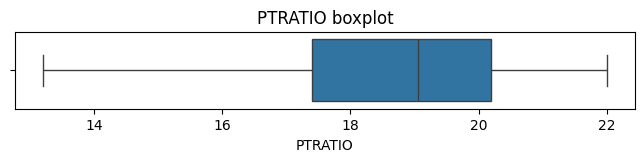

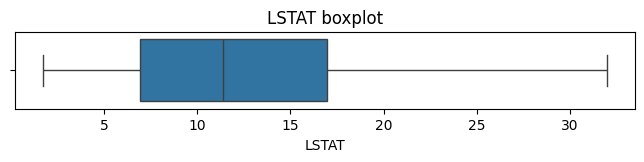

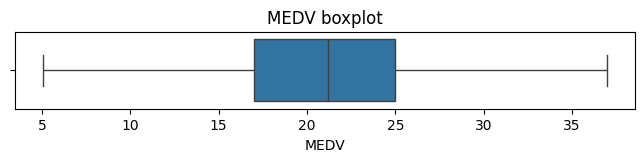

In [63]:
##check about outliers
num_cols = df.select_dtypes("number").columns
for col in num_cols:
    plt.figure(figsize=(8, 1))
    sns.boxplot(df[col], orient="h")
    plt.title(f"{col} boxplot")
    plt.show()

In [64]:
#spliting the data
x=df.drop('MEDV',axis=1)
y=df['MEDV']

In [65]:
#normalize numerical columns
num_cols=x.select_dtypes('number').columns
scaler=MinMaxScaler()
scaler.fit(x[num_cols])
x[num_cols]=scaler.transform(x[num_cols])
x

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT
0,0.000000,0.576,0.067815,0.314815,0.608570,0.641607,0.340620,0.000000,0.208015,0.238636,0.107500
1,0.002316,0.000,0.242302,0.172840,0.556402,0.782698,0.441539,0.043478,0.104962,0.522727,0.245100
2,0.002314,0.000,0.242302,0.172840,0.815210,0.599382,0.441539,0.043478,0.104962,0.522727,0.076077
3,0.002874,0.000,0.063050,0.150206,0.751863,0.441813,0.567540,0.086957,0.066794,0.625000,0.040023
4,0.006921,0.000,0.063050,0.150206,0.802337,0.528321,0.567540,0.086957,0.066794,0.625000,0.119077
...,...,...,...,...,...,...,...,...,...,...,...
501,0.006213,0.000,0.420455,0.386831,0.614668,0.681771,0.155214,0.000000,0.164122,0.886364,0.262631
502,0.004298,0.000,0.420455,0.386831,0.454438,0.760041,0.133227,0.000000,0.164122,0.886364,0.243116
503,0.006007,0.000,0.420455,0.386831,0.744411,0.907312,0.119420,0.000000,0.164122,0.886364,0.129331
504,0.011394,0.000,0.420455,0.386831,0.682757,0.889804,0.144894,0.000000,0.164122,0.886364,0.157116


In [66]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt


Simple Linear Regression using RM - MSE: 28.92


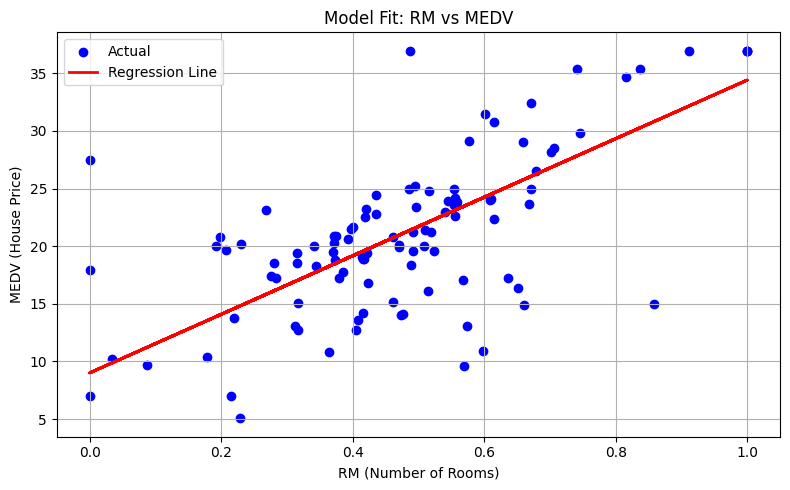

In [67]:
from sklearn.linear_model import LinearRegression

# Select the "RM" feature (Average number of rooms)
x_simple = x[["RM"]]

# Split the data into training and testing sets (80% train, 20% test)
x_train, x_test, y_train, y_test = train_test_split(
    x_simple, y, test_size=0.2, random_state=42
)

# Create and train a simple linear regression model
model = LinearRegression()
model.fit(x_train, y_train)

# Predict house prices on the test set
y_pred = model.predict(x_test)

# Calculate Mean Squared Error (MSE) to evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Simple Linear Regression using RM - MSE: {mse:.2f}")

# Plot the actual vs predicted values
plt.figure(figsize=(8, 5))
plt.scatter(x_test, y_test, color="blue", label="Actual")  # Actual values
plt.plot(x_test, y_pred, color="red", linewidth=2, label="Regression Line")  # Predicted line
plt.xlabel("RM (Number of Rooms)")
plt.ylabel("MEDV (House Price)")
plt.title("Model Fit: RM vs MEDV")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Multiple Linear Regression – MSE: 13.82


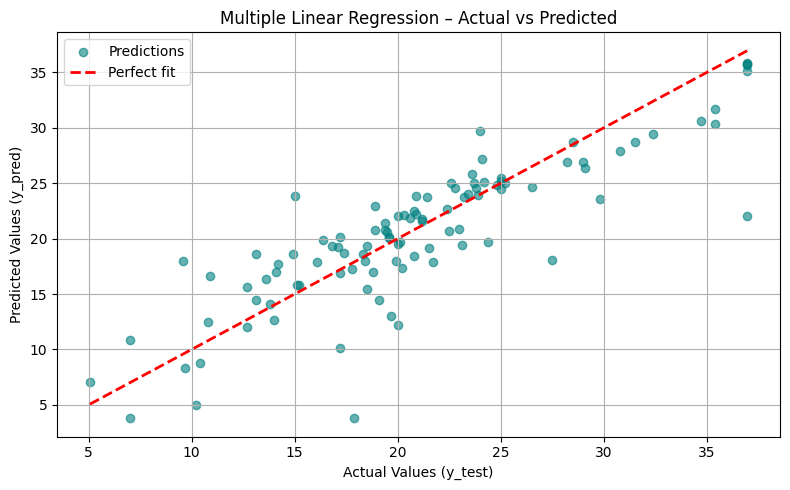

In [68]:
# Select specific features for multiple linear regression
x = x[["RM", "PTRATIO", "LSTAT"]]

# Split the data into training and testing sets (80% train, 20% test)
x_train, x_test, y_train, y_test = train_test_split(
    x, y,
    test_size=0.2,
    random_state=42
)

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(x_train, y_train)

# Predict the target values for the test set
y_pred = model.predict(x_test)

# Evaluate the model using Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Multiple Linear Regression – MSE: {mse:.2f}")

# Visualization: Actual vs. Predicted values
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, alpha=0.6, color="teal", label="Predictions")  # predicted values
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()], "r--", linewidth=2, label="Perfect fit")  # ideal line
plt.xlabel("Actual Values (y_test)")
plt.ylabel("Predicted Values (y_pred)")
plt.title("Multiple Linear Regression – Actual vs Predicted")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Polynomial Regression (Degree 4) – Test MSE: 9.29


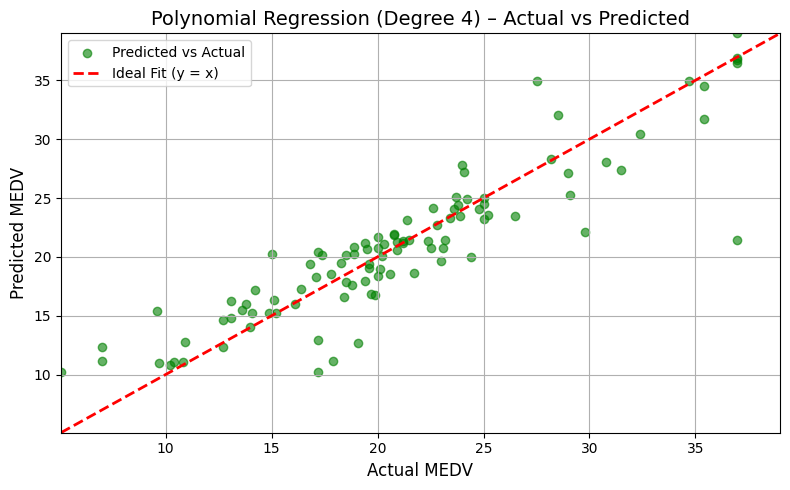

In [69]:
# Import PolynomialFeatures from scikit-learn
from sklearn.preprocessing import PolynomialFeatures

# Select the desired features
x = x[["RM", "PTRATIO", "LSTAT"]]

# Split the dataset into training and testing sets (80% train, 20% test)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Create polynomial features of degree 4
poly = PolynomialFeatures(degree=4, include_bias=False)
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.transform(x_test)

# Train a Linear Regression model on the polynomial features
model = LinearRegression()
model.fit(x_train_poly, y_train)

# Predict on both training and test data
y_train_pred = model.predict(x_train_poly)
y_test_pred = model.predict(x_test_poly)

#  Calculate test MSE
mse = mean_squared_error(y_test, y_test_pred)
print(f"Polynomial Regression (Degree 4) – Test MSE: {mse:.2f}")

# Compute the range for the ideal line
min_val = min(y_test.min(), y_test_pred.min())
max_val = max(y_test.max(), y_test_pred.max())

# Plotting predicted vs actual values
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_test_pred, color='green', alpha=0.6, label='Predicted vs Actual')
plt.plot([min_val, max_val], [min_val, max_val], 'r--', linewidth=2, label='Ideal Fit (y = x)')
plt.xlabel("Actual MEDV", fontsize=12)
plt.ylabel("Predicted MEDV", fontsize=12)
plt.title("Polynomial Regression (Degree 4) – Actual vs Predicted", fontsize=14)
plt.xlim(min_val, max_val)
plt.ylim(min_val, max_val)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [70]:
#best model for this dataset is Polynomialregression because it has a smallest mse